# **Breast Cancer Diagnosis with Decision Tree**

Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates. Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body. 

Our task is to predict whether the cancer is benign or malignant in patients data. After that we must print an B or M value as the patient `diagnosis` for each `id` row in the test set by create submission file.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tfug-prayagraj-breast-cancer-diagnostic/sample_submission.csv
/kaggle/input/tfug-prayagraj-breast-cancer-diagnostic/train.csv
/kaggle/input/tfug-prayagraj-breast-cancer-diagnostic/test.csv


**Firstly**, I loaded the train and test dataset and observed the contents.

In [2]:
train = pd.read_csv('/kaggle/input/tfug-prayagraj-breast-cancer-diagnostic/train.csv')
test = pd.read_csv('/kaggle/input/tfug-prayagraj-breast-cancer-diagnostic/test.csv')

train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
test.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,90312,19.550,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.1251,0.2414,0.38290,0.18250,0.2576,0.07602
1,90317302,10.260,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,0.1800,...,11.38,15.65,73.23,394.5,0.1343,0.1650,0.08615,0.06696,0.2937,0.07722
2,903483,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,...,10.17,22.80,64.01,317.0,0.1460,0.1310,0.00000,0.00000,0.2445,0.08865
3,903507,15.490,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,...,21.20,29.41,142.10,1359.0,0.1681,0.3913,0.55530,0.21210,0.3187,0.10190
4,903516,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,...,26.23,28.74,172.00,2081.0,0.1502,0.5717,0.70530,0.24220,0.3828,0.10070


I checked if there is **missing data** in the train dataset, but there is **none**.

In [4]:
train.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

I checked with Box plot whether there is **outlier** value or not. I found that there are several outliers in each variable. Instead of operating on outliers, I preferred the *Decision Tree* algorithm, which is one of the machine learning algorithms that is resistant to these values.

In [5]:
import plotly.express as px
import pandas as pd

fig = px.box(train.iloc[:,2:12])
fig.show()

In [6]:
fig = px.box(train.iloc[:,12:22])
fig.show()

In [7]:
fig = px.box(train.iloc[:,22:])
fig.show()

I noticed that in the train data set, the variable `diagnosis` is **categorical** and the remaining variables are **numerical**.

In [8]:
train.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Descriptive statistics of the train dataset

In [9]:
train.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.890000e+02,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,...,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,2.703005e+07,14.338085,18.980180,93.437841,674.739846,0.096910,0.106998,0.094327,0.051901,0.183186,...,16.622584,25.343985,109.617069,919.890231,0.133240,0.263203,0.284089,0.119625,0.296900,0.084559
std,1.111087e+08,3.573300,4.146792,24.612722,357.460168,0.013946,0.055122,0.082024,0.039796,0.028689,...,4.969510,6.163886,34.440316,584.849742,0.023506,0.167125,0.213764,0.067647,0.067459,0.019176
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.629650e+05,11.810000,15.900000,75.710000,428.900000,0.086940,0.066360,0.030360,0.020740,0.163400,...,13.110000,20.790000,84.480000,521.700000,0.117000,0.145700,0.114400,0.063160,0.255400,0.071270
50%,8.917030e+05,13.500000,18.660000,87.210000,562.100000,0.096760,0.095800,0.069500,0.037800,0.180900,...,15.150000,25.050000,99.210000,706.200000,0.132200,0.220800,0.243400,0.108700,0.285200,0.080220
75%,8.812877e+06,16.260000,21.580000,108.100000,817.700000,0.106200,0.133600,0.137900,0.079440,0.196700,...,19.770000,29.330000,129.200000,1218.000000,0.148100,0.354200,0.396500,0.173200,0.325800,0.092610
max,9.010343e+08,28.110000,39.280000,188.500000,2499.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,33.130000,49.540000,229.300000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


I looked at the percentiles of the `diagnosis` with the Pie Chart.

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(data=[go.Pie(labels=["Benign", "Malignant"], values=train["diagnosis"].value_counts(), hole=.3, name="DIAGNOSIS")])
fig.update_layout(
    title_text="Pie Chart of Breast Cancer Diagnosis",
    annotations=[dict(text='DIAGNOSIS', x=0.5, y=0.5, font_size=15, showarrow=False)])
fig.show()

In the **data preprocessing step**, we need to convert our categorical variable into a numerical variable in order to be able to analyze it. We assigned "*0*" to **Benign** values and "*1*" to **Malignant** values in `diagnosis` .

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
train['diagnosis']= label_encoder.fit_transform(train['diagnosis'])

Before modeling, let's separate the **target** variable (*diagnosis*) from the data set.

In [12]:
target = train["diagnosis"]
data = train.drop(labels = ["diagnosis"],axis = 1)
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let's take a look at the relationship between numerical variables.

Text(0.5, 1.0, 'Breast Cancer Features Correlation')

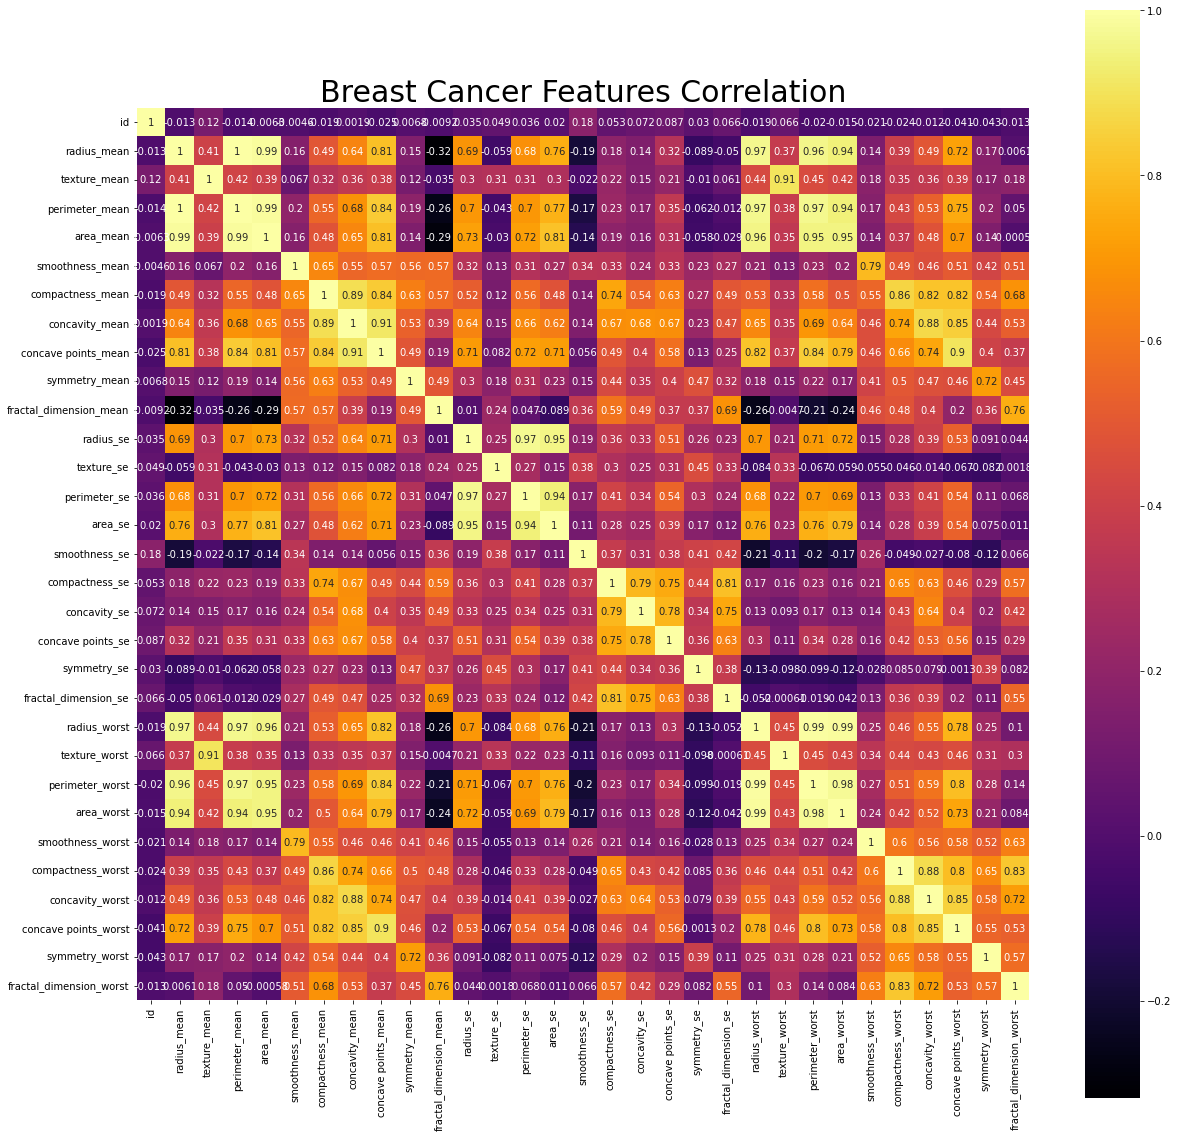

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),square=True,cmap="inferno", linecolor='w',annot=True, ax=ax)
plt.title('Breast Cancer Features Correlation', fontsize = 30)

> For example, There is a positive and strong relationship between `radius_mean` and `perimeter_mean`, `area_mean`, `radius_worst`, `perimeter_worst` and `area_worst` variables. (over 90%)

I split 80% train and 20% test subsets.

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.20, random_state = 0)

The values of all numerical variables are not on the same scale. So I rescaled the data using **Standardization**.

In [15]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

I built a **decision tree** model and training. I then tested it and observed the results.

In [16]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0])

I rescaled the test data using Standardization and printed the estimates.

In [18]:
from sklearn.preprocessing import StandardScaler

sc_t = StandardScaler()
test = sc_t.fit_transform(test)

In [19]:
output = classifier.predict(test)
print(len(output))

180


In [20]:
output

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0])

If we compare the prediction and the actual results in the confusion matrix, my model has made 72 successful 6 misclassifications. My model showed **92.3%** success and our error rate is low.

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[38  3]
 [ 3 34]]


In [22]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9230769230769231

In [23]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.2773500981126146

The branching of my decision tree model with a depth of 4 is as follows:

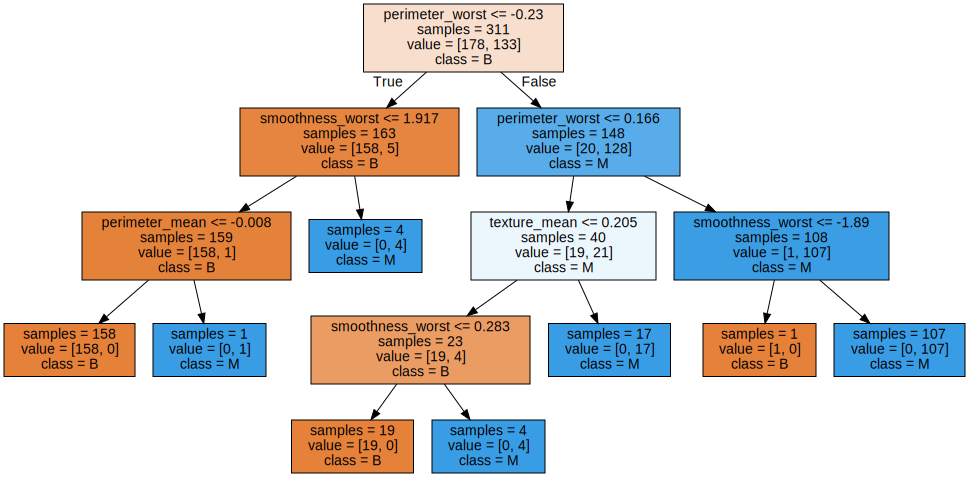

In [24]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(classifier, out_file=None, class_names=["B", "M"],
feature_names=data.columns,impurity=False, filled=True)
g = graphviz.Source(dot_data)
g

I print an B or M value as the patient diagnosis for each id row in the test set by create submission file.

In [25]:
df = pd.DataFrame(output)
df.index.name='id'
df.index+=1
df.columns=['diagnosis']
df.to_csv('my_submission.csv', header=True)
df.head()

,diagnosis
id,
1,1
2,0
3,0
4,1
5,1


In [26]:
my_submission = pd.read_csv('/kaggle/working/my_submission.csv')
my_submission["diagnosis"] = my_submission["diagnosis"].replace({0:'B',1:'M'})
my_submission.head()

,id,diagnosis
0,1,M
1,2,B
2,3,B
3,4,M
4,5,M
